# Euler's Method:

We want to build an ODE solver that allows us to specify an IVP, and then outputs a table and graph of the DE.

 - $y_{n+1} = y_n + h*y'(x_n, y_n)$

Test Example:

 - $ y'(x) = y-x^2+1$

 - $y(0) = 0.5$

,n,x_n,y_n,y_p,y_n+1
0,0.0,0.0000,0.500000,1.500000,0.500750
1,1.0,0.0005,0.500750,1.500750,0.501500
2,2.0,0.0010,0.501500,1.501499,0.502251
3,3.0,0.0015,0.502251,1.502249,0.503002
4,4.0,0.0020,0.503002,1.502998,0.503754
...,...,...,...,...,...
9995,9995.0,4.9975,-38.032326,-62.007332,-38.063329
9996,9996.0,4.9980,-38.063329,-62.043333,-38.094351
9997,9997.0,4.9985,-38.094351,-62.079353,-38.125391
9998,9998.0,4.9990,-38.125391,-62.115392,-38.156448


Text(0.5, 1.0, 'ODE Plot, dx = 0.0005')

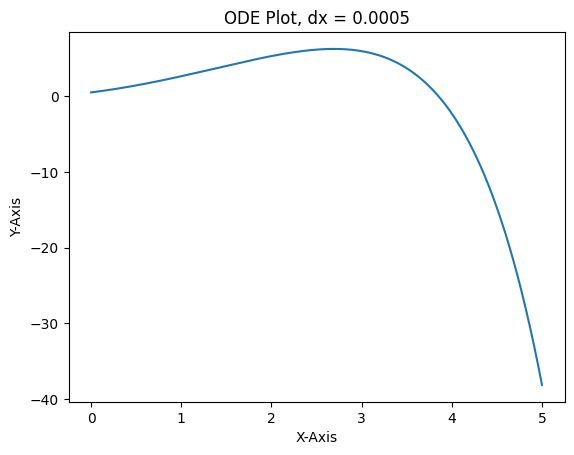

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#initial values
x0 = 0
y0 = 0.5
n = 10000 #granularity
lastX = 5 #ending x value

# get y prime evaluated at x and y - THIS IS WHERE YOU PUT THE DE
def YP(x,y):
    return float(y-x**2+1)

# get the next y value based on current x and y
def new_y(x,y,h):
    return y + h*YP(x,y)

# initialize dataframe
cols = ['n', 'x_n', 'y_n', 'y_p', 'y_n+1']
ode = pd.DataFrame(columns=cols)


# get n for intended last y value

def get_h(granularity, endval, startval):
    return (-endval+startval)/granularity

#define dx
h = get_h(n,x0,lastX)
ode.loc[0] = [0, x0, y0, YP(x0,y0), new_y(x0,y0,h)] #set first row w/ initial conditions

#fill out the table
for i in range(1,n):
    ode.loc[i,'n'] = i
    ode.loc[i,'x_n'] = ode.loc[i-1,'x_n'] + h
    ode.loc[i,'y_n'] = ode.loc[i-1,'y_n+1']
    ode.loc[i,'y_p'] = YP(ode.loc[i,'x_n'],ode.loc[i,'y_n'])
    ode.loc[i,'y_n+1'] = new_y(ode.loc[i,'x_n'],ode.loc[i,'y_n'], h)

#display the table
display(ode)

#plot the figure
plt.figure
plt.plot(ode['x_n'],ode['y_n'])
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.title(f'ODE Plot, dx = {h}')

# Monte-Carlo Simulation:

Algorithm:
 - Sample randomly according to a uniform distribution in $[a,b]$.
 
 - Generate $dx$ list.

 - Use Euler's method, but don't use $n*h$, use $dx_i$ from the $dx$ list.

,n,x_n,y_n,y_p,y_n+1
0,0.0,0.000000,0.500000,1.500000,0.500400
1,1.0,0.000831,0.500400,1.500399,0.501646
2,2.0,0.000911,0.501646,1.501645,0.501767
3,3.0,0.002382,0.501767,1.501762,0.503976
4,4.0,0.002728,0.503976,1.503969,0.504496
...,...,...,...,...,...
9994,9994.0,4.997611,-38.147098,-62.123213,-38.246861
9995,9995.0,4.997720,-38.246861,-62.224070,-38.253668
9996,9996.0,4.998059,-38.253668,-62.234261,-38.274735
9997,9997.0,4.998187,-38.274735,-62.256610,-38.282722


Text(0.5, 1.0, 'ODE Plot, Granularity = 10000 Samples')

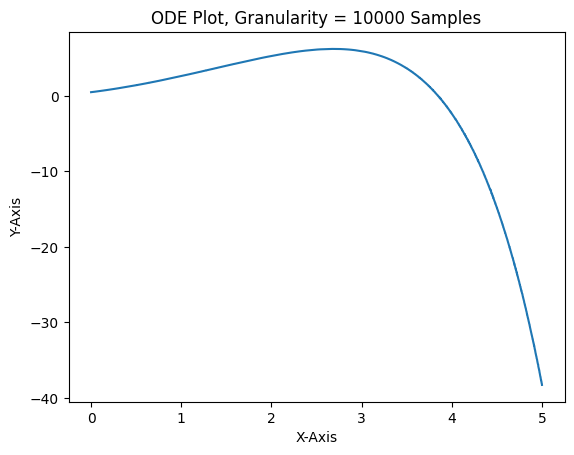

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd

#initial values
x0 = 0
y0 = 0.5
n = 10000 #granularity
lastX = 5 #ending x value

# get y prime evaluated at x and y - THIS IS WHERE YOU PUT THE DE
def YP(x,y):
    return float(y-x**2+1) 

# get the next y value based on current x and y
def new_y(x,y,h):
    return y + h*YP(x,y)

# initialize dataframe
cols = ['n', 'x_n', 'y_n', 'y_p', 'y_n+1']
ode = pd.DataFrame(columns=cols)

# get n for intended last y value

def get_h(granularity, endval, startval):
    #get our random sample list, in order.
    xsample = []
    for i in range(granularity):
        xsample += [rd.uniform(startval,endval)]
    
    xsample.sort()
    #get the dx list
    
    dx = []
    for i in range(len(xsample)-1):
        dx += [xsample[i+1]-xsample[i]]

    return dx

#define dx
dx = get_h(n,lastX,x0)
ode.loc[0] = [0, x0, y0, YP(x0,y0), new_y(x0,y0,dx[0])]

#fill out the table
for i in range(1,len(dx)):
    ode.loc[i,'n'] = i
    ode.loc[i,'x_n'] = ode.loc[i-1,'x_n'] + dx[i]
    ode.loc[i,'y_n'] = ode.loc[i-1,'y_n+1']
    ode.loc[i,'y_p'] = YP(ode.loc[i,'x_n'],ode.loc[i,'y_n'])
    ode.loc[i,'y_n+1'] = new_y(ode.loc[i,'x_n'],ode.loc[i,'y_n'], dx[i])

#display the table
display(ode)

#plot the figure
plt.figure
plt.plot(ode['x_n'],ode['y_n'])
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.title(f'ODE Plot, Granularity = {n} Samples')